# Black Friday Sales Prediction

### Sayantan Ghosh
### EmpId: 11417

## Problem Statement: 

* A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.

* The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

* Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### Data Dictionary:

| Variable | Description |
| --- | --- |
| User_ID | User_ID |
| Product_ID | Product ID |
| Gender | Sex of User |
| Age | Age in bins |
| Occupation | Occupation (Masked) |
| City_Category | Category of the City (A,B,C) |
| Stay_In_Current_City_Years | Number of years stay in current city |
| Marital_Status | Marital Status |
| Product_Category_1 | Product Category (Masked) |
| Product_Category_2 | Product may belongs to other category also (Masked) |
| Product_Category_3 | Product may belongs to other category also (Masked) |
| Purchase | Purchase Amount (Target Variable) |

---------------------------------------------------------------------------------------------------------------------------

## <u>Contents of the Notebook </u>

### 1 Data Preprocessing
    1.1 Missing Values Handling
    1.2 Analyzing Duplicate Columns as well as Quasi Constant Values
    1.3 Outlier Detection
    
    
    
### 2 Training and validation Split
    - I have splitted the data into traning and validation before Feature engineering to avoid Output Leakage. I have mapped the transformations to the validation and test data later.


### 3 Exploatory data Analysis
    - In this section I have showed all the inferences I got from the datasets and also some patterns which I have noticed. In this section I have tried to figure out some questions which will be helpful for future analysis.
    3.1 Purchase Amount dependency with product categories. 
    3.2 How Purchase amount is varrying with Age Group.
    3.3 How Purchase amount is varrying with City category and gender.
    3.4 How stay duration is related with Purchase frequency.
    3.5 Most popular products among dfferent Age groups
    3.6 Most Costly Products
    3.7 Trend between Age group and Martial Status
    3.8 How Purchase is varrying with Occupation status
    3.9 Univariate Analysis
    
    
### 4 Feature engineering
    4.1 Derving New features based on EDA - I have derived 8 new features based on EDA inferences.
        4.1.1 Total category
        4.1.2 Product_popularity_Score
        4.1.3 User_popularity_Score
        4.1.4 Occupation_Score
        4.1.5 Age_Gender_Ratio
        4.1.6 Population_Duration
        4.1.7 Cat1_Popularity_per_User
        4.1.8 Category1_Group
    4.2 Encoding of the categorical Columns
        4.2.1 Encoding Methodology of the Gender Column
        4.2.2 Encoding Methodology of the Age Column
        4.2.3 Encoding Methodology of City Category Column
        4.2.4 Encoding Methodology of Stay_In_Current_City_Years Column
        4.2.5 Dropping the ID columns
    
    

### 5 Mapping the Feature Engineering Functions to the Validation Set

### 6 Feature Selection Methodologies
    6.1 Recursive Feature Elemination
    6.2 Feature Importance Curve
    6.3 RMSE Score Dependency among different Feature Subset.
    
### 7 Model Selection and hyper Parameter tuning

    

----------------------------------------------------------------------------------------------------------------------------

In [281]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


#Encoding Libraries
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#Feature Selection
from sklearn.feature_selection import VarianceThreshold


from scipy import stats
from scipy.stats import norm, skew

#Library for Model Selection
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

## Data loading

In [118]:
#Loading the train and test dataset
sales_data_train = pd.read_csv('./train_data/train.csv')


sales_data_test = pd.read_csv('./test_data/test.csv')



submission = pd.read_csv('sample_submission_sayantan.csv')

submission['Purchase'] = 0
submission['User_ID'] = sales_data_test['User_ID']
submission['Product_ID'] = sales_data_test['Product_ID']

In [119]:
submission.head()

,Purchase,User_ID,Product_ID
0,0,1000004,P00128942
1,0,1000009,P00113442
2,0,1000010,P00288442
3,0,1000010,P00145342
4,0,1000011,P00053842


In [120]:
submission.shape

(233599, 3)

In [121]:
sales_data_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [122]:
sales_data_test.shape

(233599, 11)

In [123]:
#Looking the first 5 rows of the train dataset
sales_data_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [124]:
#Shape of the Train Data
print(f"Train Datset shape : {sales_data_train.shape}")

#Shape of the Test Data
print(f"Test Datset shape : {sales_data_test.shape}")

Train Datset shape : (550068, 12)
Test Datset shape : (233599, 11)


In [125]:
# Dataset Columns
print(sales_data_train.columns)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


In [126]:
#Lets checkout the dataypes of the data
sales_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [127]:
#Let's analyze the overall statistics of the dataset
sales_data_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


-------------------------------------------------------------------------------------------------------------------------

# 2 Data Preprocessing

### 2.1  Missing Values Handling

* As from the below plot it is visible that there are some missing values in the dataset. showMissingValues function will show all the missing values in the dataset.

In [128]:
#Function to show all the missing values of the dataset
def showMissingValues(dataset):
    for col in dataset.columns.tolist():          
        print(f" {col} column missing values: {dataset[col].isnull().sum()}")
    print('\n')
    

print("Train data-------------------------------------")
showMissingValues(sales_data_train)

print("Validation dataset--------------------------------------")
showMissingValues(sales_data_test)

Train data-------------------------------------
 User_ID column missing values: 0
 Product_ID column missing values: 0
 Gender column missing values: 0
 Age column missing values: 0
 Occupation column missing values: 0
 City_Category column missing values: 0
 Stay_In_Current_City_Years column missing values: 0
 Marital_Status column missing values: 0
 Product_Category_1 column missing values: 0
 Product_Category_2 column missing values: 173638
 Product_Category_3 column missing values: 383247
 Purchase column missing values: 0


Validation dataset--------------------------------------
 User_ID column missing values: 0
 Product_ID column missing values: 0
 Gender column missing values: 0
 Age column missing values: 0
 Occupation column missing values: 0
 City_Category column missing values: 0
 Stay_In_Current_City_Years column missing values: 0
 Marital_Status column missing values: 0
 Product_Category_1 column missing values: 0
 Product_Category_2 column missing values: 72344
 Product_

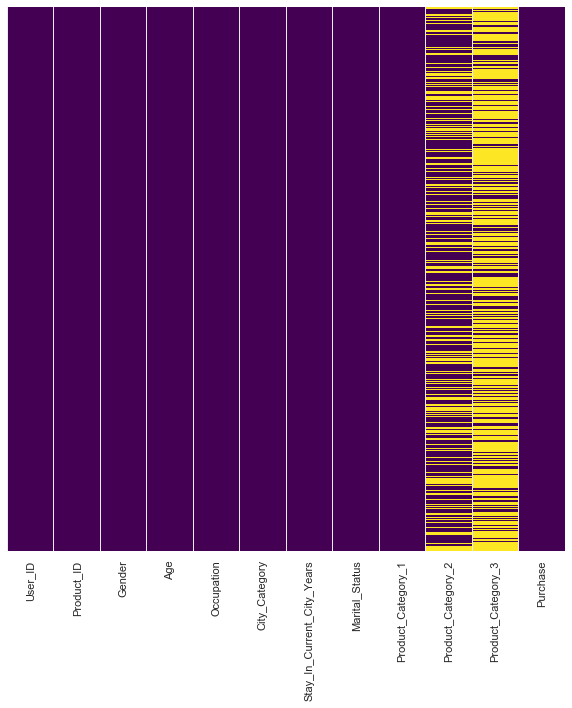

In [129]:
#Analyzing the missing values distribution over the train dataset
fig = plt.figure(figsize=(10,10))
sns.heatmap(sales_data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

* There are two columns having missing values - Product_Category2 & Product_Category_3

In [130]:
#Finding the perchentage of Missing values
print(f"Total perchentage of missing values in Product_Category2 is {sales_data_train['Product_Category_2'].isnull().sum() / sales_data_train.shape[0]}")
print(f"Total perchentage of missing values in Product_category3 is {sales_data_train['Product_Category_3'].isnull().sum() / sales_data_train.shape[0]}")

Total perchentage of missing values in Product_Category2 is 0.3156664266963357
Total perchentage of missing values in Product_category3 is 0.6967265865311197


#### Function to replace missing values in Category 2 and Category 3..

* Objective:
* Product Category 2 and 3 has missing values because the customer didn't buy these type of categories. very few customers     bought all 3 types of products.
* It will not be a right choice if we fill the missing values with mean or 0 as the values were masked and 0 can also be a category.

* So it will be a good choice to fill the missing values with -1 which suggests there is no category of that type.

In [131]:
#Filling missing values of Product category2 by grouping of Product Category1
def fillMissingProduct(dataset):
    dataset['Product_Category_2'] = dataset['Product_Category_2'].fillna(-1) 
    dataset['Product_Category_3'] = dataset['Product_Category_3'].fillna(-1) 
    return dataset

sales_data_train = fillMissingProduct(sales_data_train)

In [132]:
sales_data_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

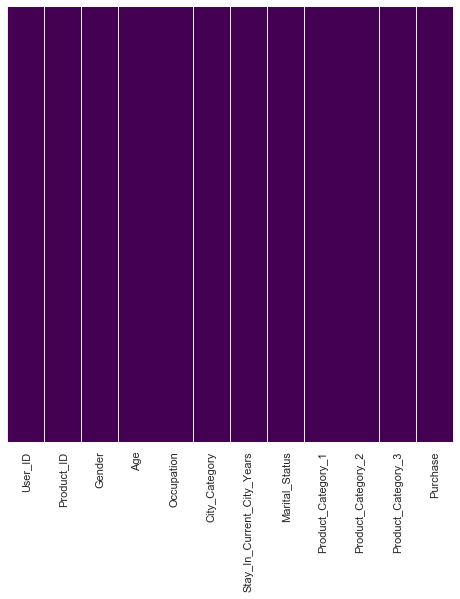

In [133]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(sales_data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Converting the Product category2 and Category3 type to int as to main consistency across the dataset.

In [134]:
def ProperType(dataset):
    dataset['Product_Category_2'] = dataset['Product_Category_2'].astype(int)
    dataset['Product_Category_3'] = dataset['Product_Category_3'].astype(int)
    return  dataset

sales_data_train = ProperType(sales_data_train)

## 2.2 <u>Analyzing Duplicate Columns as well as Quasi Constant Values</u>

### Duplicate Columns

In [135]:
def findDuplicateColumns(dataset):
    duplicateColumnNames = set()
    for x in range(dataset.shape[1]):
        col1 = dataset.iloc[:,x]
        for y in range(x+1, dataset.shape[1]):
            col2 = dataset.iloc[:, y]
            if col1.equals(col2):
                duplicateColumnNames.add(dataset.columns.values[y])
    return list(duplicateColumnNames)

dup_cols = findDuplicateColumns(sales_data_train)

In [136]:
dup_cols

[]

* There are no duplicate columns in the dataset.

In [137]:
#Delete duplicate Records
sales_data_train.loc[sales_data_train.duplicated(),:]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


## 2.3  <u> Outlier Detection to detect if any Purchase Amount is very high or low</u>

* It is important to detect and analyze the upper boundary and lower boundary to analyze significant deviation in the data.
* Box Plot and 1.5 IQR rule is used here to detect outliers as there is not such outliers as seen from the observation.

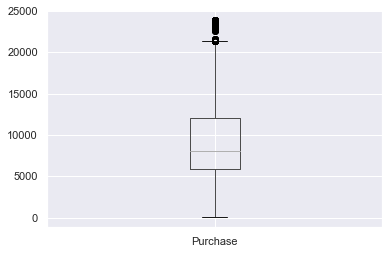

In [138]:
boxplot = sales_data_train.boxplot(column = ['Purchase'])

In [139]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [140]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(sales_data_train, 'Purchase', 1.5)
upper_boundary, lower_boundary

(21400.5, -3523.5)

In [141]:
sales_data_train[sales_data_train['Purchase']>25017.75]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [142]:
sales_data_train[sales_data_train['Purchase']< -3523.5]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


----------------

# 3 Traning and Validation split.

* I have used test size = 0.25 which means 75% of teh data is for training and 25% for validation.

In [143]:
X_train = sales_data_train.drop('Purchase',axis=1)
y_train = sales_data_train['Purchase']

In [144]:
from sklearn.model_selection import train_test_split 
X_train_,X_validation_,y_train_,y_validation_ = train_test_split(X_train,y_train,test_size=0.3,random_state=0)

In [145]:
X_train_.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
532017,1003916,P00057642,M,26-35,4,A,2,1,1,15,16
153907,1005788,P00223542,M,26-35,0,A,4+,0,1,8,17
162868,1001179,P00100642,M,51-55,1,B,2,1,5,15,-1
75278,1005604,P00059942,M,36-45,15,C,3,0,8,14,-1
525591,1003011,P00058442,M,26-35,1,B,1,0,5,14,-1


In [146]:
#Shape of Training Dataset
X_train_.shape

(385047, 11)

In [147]:
#Shape of Validation Dataset
X_validation_.shape

(165021, 11)

In [148]:
X_validation_.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
41001,1000306,P00093542,M,18-25,0,C,3,0,1,6,-1
16151,1002478,P0097142,M,51-55,1,A,0,0,12,-1,-1
507262,1000129,P00129842,M,26-35,11,C,2,0,6,8,15
368698,1002816,P00025442,M,26-35,7,C,4+,1,1,2,9
353782,1000514,P00220442,M,26-35,2,A,1,1,5,14,-1


-------------------------------------

# 1 Exploatory data Analysis .................................

* Exploatory Data Analysis will be done on Train dataset.

## Purchase Column(target variable) analysis based on Product Categories

In [149]:
#Function to analye how Purchase amount is dependent upon Product categories.
def categoryVsPurchase(dataset):
    f,ax = plt.subplots(1,3,figsize=(20,6))
    most_freq_category1 = dataset.groupby('Product_Category_1')['Purchase'].sum().reset_index()
    most_freq_category2 = dataset.groupby('Product_Category_2')['Purchase'].sum().reset_index()
    most_freq_category3 = dataset.groupby('Product_Category_3')['Purchase'].sum().reset_index()
    sns.barplot(x='Product_Category_1',y='Purchase',data = dataset,palette="muted",ax = ax[0])
    sns.barplot(x='Product_Category_2',y='Purchase',data = dataset,palette="muted",ax = ax[1])
    sns.barplot(x='Product_Category_3',y='Purchase',data = dataset,palette="muted",ax = ax[2])

## 1.1 Purchase Amount is maximum for the Categories belonging to 3 Product categories.

#### "three_category" is the filtered dataset where only all the Three Product categories are present.
#### It can be clearly noticed as the from Product Category1 to Product category3 the purchase amount is increasing and there is a relationship stated below.

In [150]:
three_category = sales_data_train[(~sales_data_train['Product_Category_1'].isnull()&~sales_data_train['Product_Category_2'].isnull()&~sales_data_train['Product_Category_3'].isnull())]

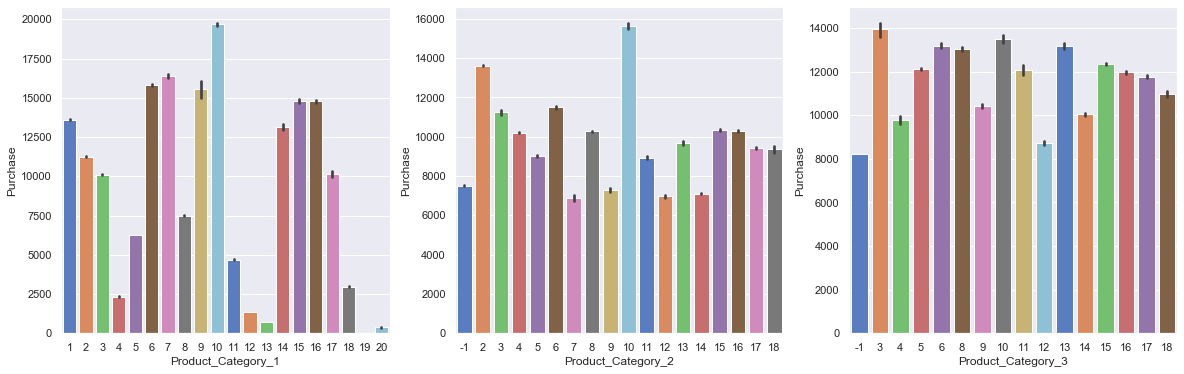

In [151]:
categoryVsPurchase(three_category)

### Inference 1: 
* As from the graph is shown below it can bee seen that Products belonging only category1 , the purchase amount is low.
* In category 1 [1,6,10,15] are the groups which are more purchased.These product  are the most sold products.

### Inference 2: 
* As from the graph is shown below it can bee seen that Products belonging only category1 as well as Category2 , the purchase amount is heigher than Inference1.

### Inference 3: 
* As from the graph is shown below it can bee seen that Products belonging only category1 , category2, and Category3 , the purchase amount is heigst.

### Inference 4:
* Products which are belonging to Category 3 also belonging to Category1 and category2.

### Inference 1:
* The charts are for the records where all the Three categories are not included. As it can be seen that where the category3 is not present the average distribution of purchase of category2 is low than the Inference2.

## 1.2 Net Purchase Analysis based on Age Group

#### Inference

* As Age group is always a important factor of purchase because evry age group range has different choice. From the below plot it is visible that Feamle group has heigher purchae than Male. And also a huge fractuation is in the 26-35 age group.

* It suggests that females aged between 26-35 are the most frequent customers.

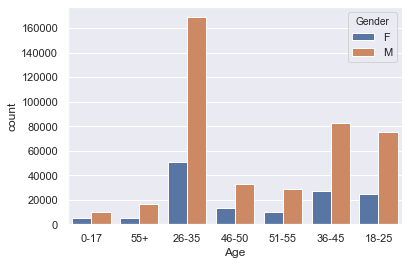

In [152]:
sns.countplot('Age',hue="Gender",data=sales_data_train)

In [153]:
sales_data_train.groupby('Age')['Purchase'].sum()

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64

Text(0, 0.5, 'Total Purchase Amount')

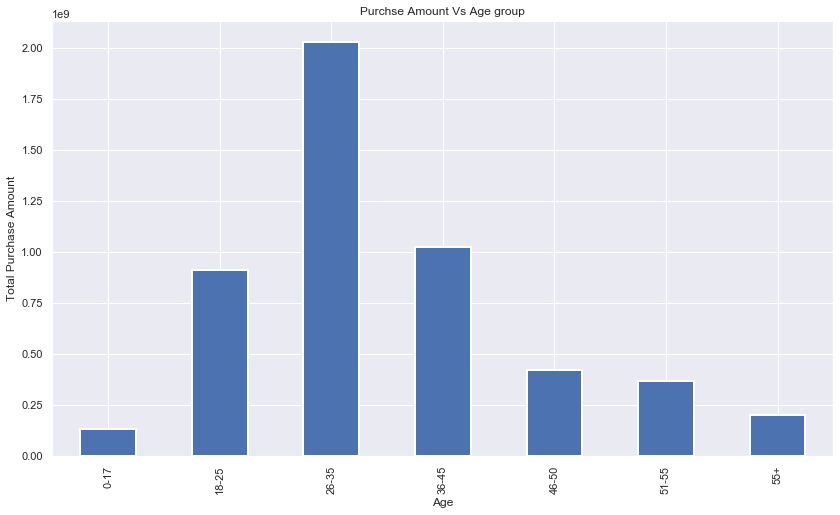

In [154]:
fig = sales_data_train.groupby('Age')['Purchase'].sum().plot(kind ="bar",figsize=(14, 8), linewidth=2)

fig.set_title('Purchse Amount Vs Age group')
fig.set_ylabel('Total Purchase Amount')

As you can see, The net purchase is heigst in 26-35 age group. It could help us to encode the Age column logically so that this information holds.

## 1.3 Net Purchase Analysis based on City Category.

#### Inference

* City position is aslo a major factor in the sales. Like ex- In town sales will be maximum compare to villages.

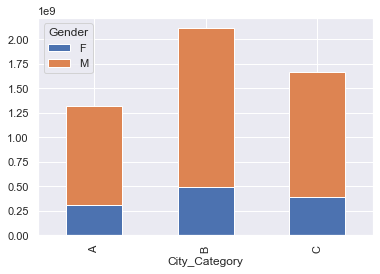

In [155]:
sales_data_train.groupby(['City_Category','Gender'])['Purchase'].sum().unstack().plot(kind='bar',stacked=True)
plt.show()


* From the above graph it is visible that there are total 3 City Categories - A, B, C. And it is visible that The heigst Net purchase is belonging to Category B and in each category the gender distribution is balanced.



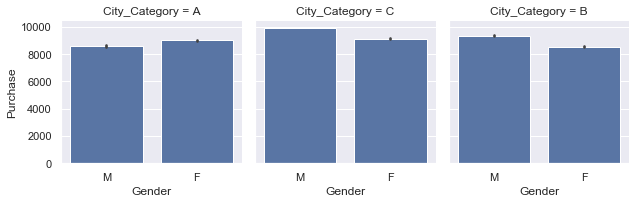

In [156]:
g = sns.FacetGrid(sales_data_train,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

* One of the Insights that can be noticed that in City category A, Females are dominating over Male but in City Category B and C Males are dominating over Females.

## 1.4 Net Purchase Analysis based on Stay Duration.

#### Inference

* Purchase can be dependent on Stay Duration because the more years a person stay in a city he has experience and the idea of products as wll as the prices. 

* But in this case there is a interesing pattern is noticed. As you can see from the Purchase vs duration plot it is clear that   the person who had a 1 year of duration stay has purchased more with respect to 4.

* So the trend is quite interesting. This analysis will help us to prioritise the stay duration in this trend while encoding.

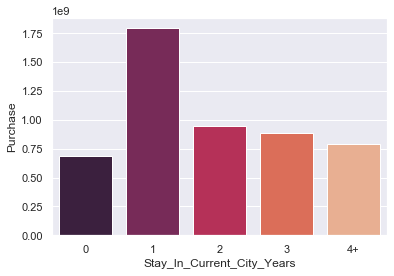

In [157]:
sales_stay_duration = sales_data_train.groupby(['Stay_In_Current_City_Years'])['Purchase'].sum().reset_index()

sns.barplot(x='Stay_In_Current_City_Years',y="Purchase",palette="rocket",data = sales_stay_duration )

In [158]:
sales_stay_duration.sort_values(by = 'Purchase', ascending = False)

,Stay_In_Current_City_Years,Purchase
1,1,1792872533
2,2,949173931
3,3,884902659
4,4+,785884390
0,0,682979229


This ranking will be useful to encode the Duration because it will hold the trend.

## 1.5 Let's Analyze the most Popular product's ID among Age groups

* It will help us to understand which product category is more famous in different Age groups. It will help us in future recommendation.

* It will also help us to derive features based on Product popularity.

In [159]:
popular_products = sales_data_train.groupby('Age')['Product_ID'].apply(lambda x: x.value_counts().index[0]).reset_index()
popular_products

,Age,Product_ID
0,0-17,P00255842
1,18-25,P00265242
2,26-35,P00265242
3,36-45,P00025442
4,46-50,P00265242
5,51-55,P00265242
6,55+,P00265242


* As you can see that POO255842 is the most popular than 0-17
* P00265242 is the most popular product ID than 18-25 , 26-35 , 46-50, 51-55, and 55+.
* P00025442 is the popular in 36-45 age group.

In [160]:
sales_data_train[sales_data_train['Product_ID'] == 'P00265242'].groupby(['Product_Category_1','Product_Category_2'])['Purchase'].mean()

Product_Category_1  Product_Category_2
5                   8                     7534.848404
Name: Purchase, dtype: float64

* As it can be seen that The most poular productID (P00265242) is belonging two two Product Categories 5 and 8 respectively.
* The mean price of the product Id is 7534 which is in the range of 5000-10000. It is an interesting trend to be noticed.

## 1.6 Most Costly Products

In [161]:
cost_product = sales_data_train.groupby('Product_ID')['Purchase'].mean().reset_index()
cost_product.sort_values(by="Purchase",ascending = False)[:10]

,Product_ID,Purchase
836,P00086242,21256.505495
827,P00085342,20980.268116
1902,P00200642,20468.773234
1070,P00116142,20463.791277
1102,P00119342,20448.756494
1085,P00117642,20400.283544
726,P00074542,20323.000000
3275,P00341542,20291.000000
519,P00052842,20141.139511
844,P00087042,20113.225000


In [162]:
sales_data_train[sales_data_train['Product_ID'] == 'P00086242' ]['Product_ID'].value_counts()

P00086242    273
Name: Product_ID, dtype: int64

* As you can see these are the top 10 productID's which are most costly as the average of the Purchase amount is heigst so only 273 products of this ID has sold and it holds the normal trend of economy.

## 1.7 Understanding the trend between Martial Status and Age Group

Text(0.5, 1.0, 'martial Status')

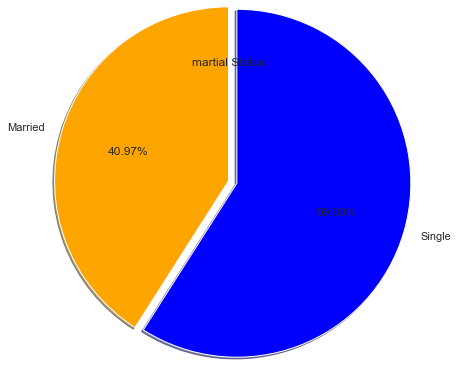

In [163]:
martial_stat = [(sales_data_train.Marital_Status==1).sum(),(sales_data_train.Marital_Status==0).sum()]
invoice_labels = ['Married','Single']
col = ['orange','blue']
plt.pie(martial_stat,colors=col,explode=(0,0.1),labels=invoice_labels,startangle=90,shadow=True,autopct='%1.2f%%',radius=2)
plt.title('martial Status')

* From the above chart it is visible that there are 60% people who are unmarried and 40% people are married.

In [164]:
x= sales_data_train.groupby(['Marital_Status','Age'])['Purchase'].sum().reset_index()

* As you can see from the above graph mostly married couple are of 26-35 age group.

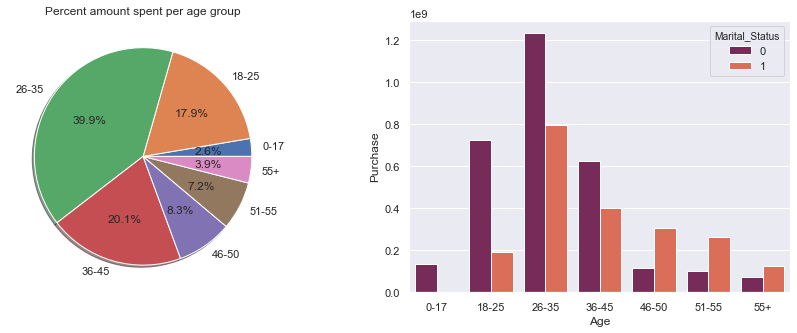

In [165]:
databyAge = sales_data_train.groupby('Age')['Purchase'].sum()
plt.figure(figsize=(15,5));
plt.subplot(121)
plt.pie(databyAge.values,labels = databyAge.index,autopct='%1.1f%%',shadow=True);
plt.title('Percent amount spent per age group');
plt.subplot(122)
sns.barplot(x='Age',y="Purchase",hue="Marital_Status",palette="rocket",data = x )

### Inferences

* People having Age group 26-35 collectively have spent heighest amount (40%). As also from the bar plot it can be seen that Males are dominating in three age groups (18-25),(26-35), and (36-45). 

* Also three age groups (46-50),(51-55), and 55+ females are dominating over male.

* There are no Married couple in the age group 0-17.

## 1.8 Let's analyze how purchase amount is dependent upon occupation status.

### Inferences:
* From the graph it is visible that Occupation masked 4,0,7,1,17 are the top 5 Occupation most common customers with the heighst Purchase capability.
* Occupation masked with 13,19, 18,9, 8 has the lowestr capability of Purchase.

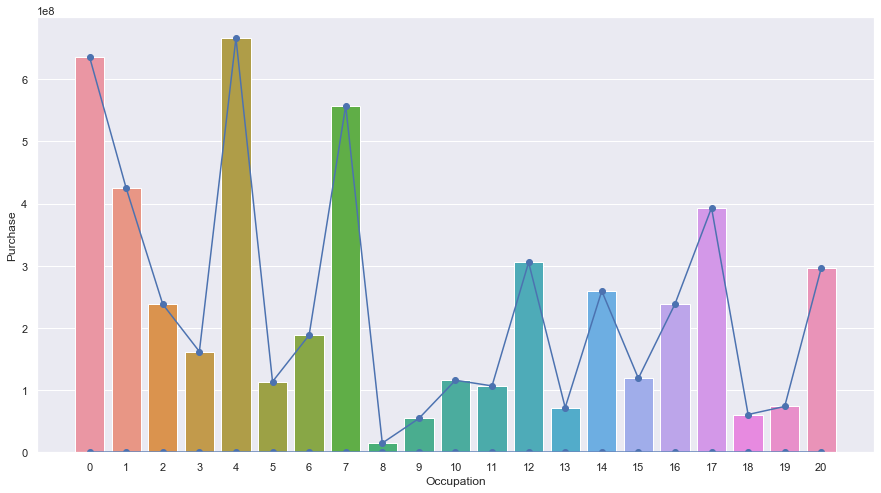

In [166]:
fig = plt.figure(figsize=(15,8))
by_occupation = sales_data_train.groupby('Occupation')['Purchase'].sum().reset_index()
sns.barplot(x='Occupation',y='Purchase',data = by_occupation)
plt.plot(by_occupation.index,by_occupation.values,'bo-');

### Average Purchase based on Occupation to understand the largest spender on Black Friday.

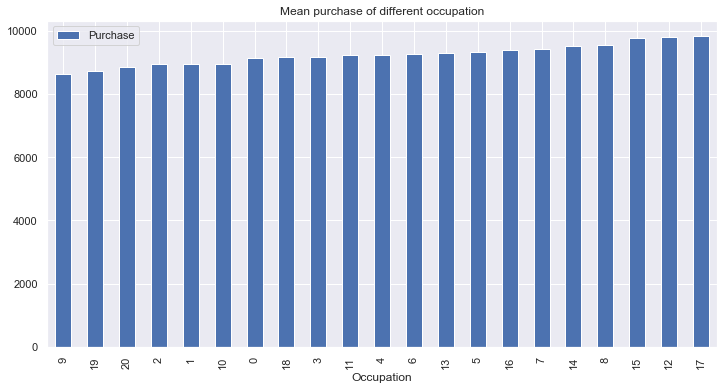

In [167]:
sales_data_train.groupby(["Occupation"]).mean()[["Purchase"]].sort_values(by="Purchase").plot.bar(title="Mean purchase of different occupation", figsize=(12, 6))

from the above mean distribution curve , it can be seen that People having occupation 15,12,17 spent more than others on Black friday which suggests that they need different marketing stratgies because they are biggest target.

In [168]:
by_occupation.sort_values(by = 'Purchase',ascending = False)

,Occupation,Purchase
4,4,666244484
0,0,635406958
7,7,557371587
1,1,424614144
17,17,393281453
12,12,305449446
20,20,296570442
14,14,259454692
16,16,238346955
2,2,238028583


### Lets analyze the occupation groups with maximum count people.

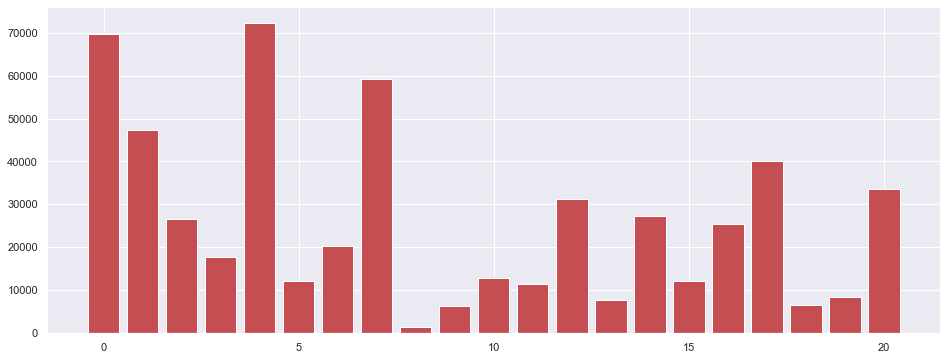

In [169]:
occupation_counts = sales_data_train['Occupation'].value_counts()
plt.figure(figsize = (16,6));
plt.bar(occupation_counts.index,occupation_counts.values,color ='r');

* Here the plot suggests Occupation with group 0,4,7,1 has the heighest count of Person.And these are the same occupation groups with most purchase. These occupations exceeds other occupations by great diffrence. So, these are the main marketing target.

## 1.9 <u>Univariate Analysis</u>

In [170]:
#Mean of the Purchase
print(f"The mean of the Purchase column is {sales_data_train['Purchase'].mean()}")

The mean of the Purchase column is 9263.968712959126


Text(0, 0.5, 'Frequency')

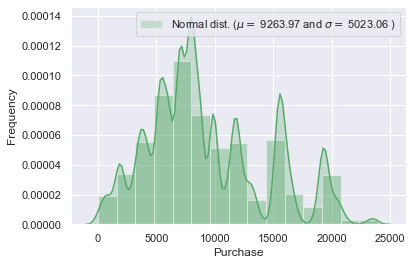

In [171]:
#Analyzing the distribution of the Purchase
sns.distplot(sales_data_train['Purchase'], bins=15,color="g", kde_kws={"shade": True})
(mu, sigma) = norm.fit(sales_data_train['Purchase'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')

* As you can see that the distribution is multimodal as there are many local miximum.
* It can be noticed that mostly the purchase amount is between 5000 - 10000

In [172]:
#Meadin of the Purchase.
print(f"The median of the Purchase column is {sales_data_train['Purchase'].median()}")

The median of the Purchase column is 8047.0


In [173]:
#Standard Deviation
print(f"The standard deviatoin of the Purchase column is {np.std(sales_data_train['Purchase'])}")

The standard deviatoin of the Purchase column is 5023.060827959972


------------------------------------------------------------------------------------------------------------------------------

In [174]:
X_validation_.shape

(165021, 11)

In [175]:
X_train_.shape

(385047, 11)

------------------------------------------------------------------------------------------------------------------------------

# 4 <u>Feature Engineering on Train data </u>

* I have done feature enginnering on train data and map the mapper functions into Test Data.
* It will also avoid Output Leakage

## 4.1 Deriving New Features based on EDA Inferences

### 4.1.1 Feature Name: Total_category 
* Total category defines how many types of categories a user bought combined on Black Friday.

#### Objective:

* As from the exploatory analysis we have seen that if a person bought all three types of Category then the Purchase amount is maximum. and the trend follows like this - 
Purchase Amount(Category1) < Purchase Amount(Category1 + category2) < Purchase Amount(Category1 + category2 +Category3)


In [177]:
def total_catgory(dataset):
    dataset['Total_category'] = 1
    dataset.loc[(dataset['Product_Category_1'] > 0) & (dataset['Product_Category_2'] < 0) & (dataset['Product_Category_3'] < 0), 'Total_category'] = 1
    dataset.loc[(dataset['Product_Category_1'] > 0) & (dataset['Product_Category_2'] > 0) & (dataset['Product_Category_3'] < 0), 'Total_category'] = 2
    dataset.loc[(dataset['Product_Category_1'] > 0) & (dataset['Product_Category_2'] > 0) & (dataset['Product_Category_3'] > 0), 'Total_category'] = 3
    return dataset

X_train_ = total_catgory(X_train_)

### 4.1.2 Feature name: Product_popularity_Score

#### Objective
* I ham creating a feature product_popularity_score which will suggests what is the occurance of each product respect to the maximum occurance of the product.

In [178]:
def Product_Popularity_Score(dataset):
    dataset['Product_popularity_Score'] = 0.0
    requires_product_data = dataset[['Product_ID','Product_popularity_Score']]
    requires_product_data['Product_Occurance'] = 1
    grouped_product_count = requires_product_data.groupby(['Product_ID']).sum()
    grouped_product_count = grouped_product_count.reset_index()
    grouped_product_count['Product_popularity_Score'] = grouped_product_count['Product_Occurance'] / float(grouped_product_count['Product_Occurance'].max())
    dataset['Product_popularity_Score'] = dataset['Product_ID'].map(grouped_product_count.set_index('Product_ID')['Product_popularity_Score'])
    return dataset

X_train_ = Product_Popularity_Score(X_train_)

### 4.1.3 Feature name: User_popularity_Score

#### Objective
* I ham creating a user product_popularity_score which will help to analyze the users behaviour and it will help to target most frequent users in the Black Friday Sales.

In [179]:
# Deriving new feature User_popularity_score
def User_Popularity_Score(dataset):
    dataset['User_popularity_Score'] = 0.0
    requires_user_data = dataset[['User_ID','User_popularity_Score']]
    #Initial Frequency is 1 and its increments which same occurs
    requires_user_data['User_Occurance'] = 1
    #Finding the total frequency of each customer
    grouped_user_count = requires_user_data.groupby(['User_ID']).sum()
    grouped_user_count = grouped_user_count.reset_index()
    # Finding the popularity with respect to most popular user
    grouped_user_count['User_popularity_Score'] = grouped_user_count['User_Occurance'] / float(grouped_user_count['User_Occurance'].max())
    dataset['User_popularity_Score'] = dataset['User_ID'].map(grouped_user_count.set_index('User_ID')['User_popularity_Score'])
    return dataset

X_train_ = User_Popularity_Score(X_train_)

### 4.2.4 Feature name: Occupation_Score

#### Objective
* As shown from the above EDA, occupation plays a vital role in predicting Purchase Amount. Each occupation groups has different Purchase amount and count of people is also different. It will help us to target for biggest spender.

* OccupationPurchase Score is between 0 and 1. 1 means it is the most common in the dataset. It will act as a standard to score Occupation groups.

In [180]:
def OccupationScore(dataset):
    Occupation_Score = pd.DataFrame(dataset["Occupation"].value_counts()).reset_index()
    Occupation_Score = Occupation_Score.rename(columns={'index':'Occupation_mask','Occupation':'People_Count'})
    Occupation_Score['Ocupation_score'] = 0.0
    Occupation_Score['Ocupation_score'] = Occupation_Score['People_Count'] / float(Occupation_Score['People_Count'].max())
    dataset['Ocupation_Score'] = dataset['Occupation'].map(Occupation_Score.set_index('Occupation_mask')['Ocupation_score'])
    return dataset

X_train_ = OccupationScore(X_train_)

### 4.2.5 Feature name: Age_Gender_Ratio

#### Objective
* As shown from the above EDA, Gender as well as Age groups plays very important role. We can see the trend that Males are mainly more dominating over females in purchase. So if we can make a ration of Male and Females in each group it can be a useful feature.

In [181]:
dup_dataset = X_train_
a = pd.DataFrame(dup_dataset.groupby(['Age'])['Gender'].value_counts())

In [182]:
a

Gender
Age   Gender        
0-17  M         7137
      F         3568
18-25 M        52658
      F        17223
26-35 M       118156
      F        35582
36-45 M        57788
      F        18885
46-50 M        22787
      F         9235
51-55 M        20054
      F         6902
55+   M        11484
      F         3588

In [183]:
age_gender_group = {'Age_Groups': ['0-17','18-25','26-35','36-45','46-50','51-55','55+'],
        'Male_ratio': [0.666,0.7545,0.7713,0.7569,0.7157,0.7392,0.7613],
        'Female_ratio':[0.334,0.2455,0.2287,0.2431,0.2843,0.2608,0.2387]
        }

In [184]:
age_gender = pd.DataFrame(age_gender_group, columns = ['Age_Groups', 'Male_ratio','Female_ratio'])

In [185]:
age_gender.head()

,Age_Groups,Male_ratio,Female_ratio
0,0-17,0.6660,0.3340
1,18-25,0.7545,0.2455
2,26-35,0.7713,0.2287
3,36-45,0.7569,0.2431
4,46-50,0.7157,0.2843


In [186]:
def Age_Gender_Ratio(dataset):
    dataset['Male_ratio'] = dataset['Age'].map(age_gender.set_index('Age_Groups')['Male_ratio'])
    dataset['Female_ratio'] = dataset['Age'].map(age_gender.set_index('Age_Groups')['Female_ratio'])
    return dataset

X_train_ = Age_Gender_Ratio(X_train_)

### 4.2.6 Feature name: Population_Duration

#### Objective
* As shown from the above EDA, there is a trend like People staying for 1 year duration has the heigst Purchase and gradually for 2years, 3 years, 4years. So, Duration can be a dependent factor for purchase. So, population_duration is a parameter which will show how many people have spent spent how many duration. Many the people in the duration of 1 year will purchase more and so on. We will measure on the scale of people staying for 1 year duration because they have the heigst average purchase and our biggest target.

In [187]:
occpation_groupby = pd.DataFrame(dup_dataset['Stay_In_Current_City_Years'].value_counts()).reset_index()
occpation_groupby = occpation_groupby.rename(columns={'index':'Stay_Duration','Stay_In_Current_City_Years':'People_Count'})
occpation_groupby['Population_fraction'] = occpation_groupby['People_Count'] / occpation_groupby['People_Count'].max()

In [188]:
occpation_groupby

,Stay_Duration,People_Count,Population_fraction
0,1,135344,1.000000
1,2,71096,0.525298
2,3,66898,0.494281
3,4+,59601,0.440367
4,0,52108,0.385004


In [189]:
def Population_Duration(dataset):
    dataset['Population_Duration'] = dataset['Stay_In_Current_City_Years'].map(occpation_groupby.set_index('Stay_Duration')['Population_fraction'])
    return dataset

X_train_ = Population_Duration(X_train_)

### 4.2.7 Feature name: Cat1_Popularity_per_User

#### Objective
* As shown below it can be seen that products of category1 has the heighest sale comperative to Product Category2 and 3 which suggests that Category1 product are most popular among the people . This feature will help us to map how many products of category1 are sold to each user in the Black friday.

* It will help in stock prediction for future sales.

In [190]:
print(f"Total Products sold of category_1 is: {X_train_['Product_Category_1'].value_counts().sum()}")
# 31183 is the sum of -1 which suggest the missing values in category2 so it is deducted.
print(f"Total Products sold of category_2 is: {X_train_['Product_Category_2'].value_counts().sum()-31183}")
# 31183 is the sum of -1 which suggest the missing values in category3 so it is deducted.
print(f"Total Products sold of category_3 is: {X_train_['Product_Category_3'].value_counts().sum()-69502}")

Total Products sold of category_1 is: 385047
Total Products sold of category_2 is: 353864
Total Products sold of category_3 is: 315545


In [191]:
#Storing the unique Users list
unique_User_list = list(dup_dataset['User_ID'].unique())

In [192]:
#Maintaining the dictionary where
# Keys: Each unique User_ID
#Values: Total Products of category1 bought by each user
dicts = {}
keys = unique_User_list
for i in keys:
        dicts[i] = dup_dataset[dup_dataset['User_ID'] == i]['Product_Category_1'].value_counts().sum()
print(dicts)

{1003916: 196, 1005788: 328, 1001179: 103, 1005604: 90, 1003011: 40, 1004238: 336, 1002129: 136, 1001119: 167, 1005841: 124, 1001741: 274, 1001005: 36, 1004564: 8, 1000802: 197, 1002943: 55, 1001968: 178, 1001312: 66, 1005186: 28, 1002266: 44, 1004819: 221, 1005387: 290, 1001354: 282, 1000839: 312, 1001202: 190, 1003182: 228, 1001449: 509, 1003371: 187, 1000195: 323, 1004016: 264, 1005753: 33, 1000463: 47, 1000644: 48, 1003854: 30, 1001116: 59, 1005767: 147, 1001949: 47, 1001579: 302, 1002166: 84, 1000473: 24, 1002170: 45, 1002941: 135, 1005636: 334, 1002842: 29, 1002859: 56, 1005615: 133, 1005350: 89, 1003791: 54, 1002870: 58, 1000368: 128, 1003320: 223, 1001165: 60, 1004647: 350, 1003230: 68, 1002073: 240, 1001980: 471, 1001875: 125, 1005759: 231, 1003401: 331, 1005888: 224, 1001430: 43, 1002500: 51, 1000244: 32, 1001137: 220, 1000321: 96, 1001680: 734, 1002192: 36, 1005567: 139, 1002909: 513, 1004369: 14, 1005493: 202, 1005156: 125, 1002380: 165, 1005956: 123, 1003821: 293, 1005526:

In [193]:
#Creating a pandas series from the dictionary
s = pd.Series(dicts, name='Total_Cat1_Purchase')
s.index.name = 'Users'

In [194]:
# Creating a dataFrame to map into original Datset
users_data = pd.DataFrame(s.reset_index())

In [195]:
users_data.head()

,Users,Total_Cat1_Purchase
0,1003916,196
1,1005788,328
2,1001179,103
3,1005604,90
4,1003011,40


In [196]:
def Cat1_Popularity_User(dataset):
    dataset['Cat1_Popularity_per_User'] = dataset['User_ID'].map(users_data.set_index('Users')['Total_Cat1_Purchase'])
    return dataset

In [197]:
X_train_ = Cat1_Popularity_User(X_train_)
X_train_.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Total_category,Product_popularity_Score,User_popularity_Score,Ocupation_Score,Male_ratio,Female_ratio,Population_Duration,Cat1_Popularity_per_User
532017,1003916,P00057642,M,26-35,4,A,2,1,1,15,16,3,0.756223,0.267030,1.000000,0.7713,0.2287,0.525298,196
153907,1005788,P00223542,M,26-35,0,A,4+,0,1,8,17,3,0.232064,0.446866,0.955926,0.7713,0.2287,0.440367,328
162868,1001179,P00100642,M,51-55,1,B,2,1,5,15,-1,2,0.224012,0.140327,0.652652,0.7392,0.2608,0.525298,103
75278,1005604,P00059942,M,36-45,15,C,3,0,8,14,-1,2,0.019034,0.122616,0.167389,0.7569,0.2431,0.494281,90
525591,1003011,P00058442,M,26-35,1,B,1,0,5,14,-1,2,0.284773,0.054496,0.652652,0.7713,0.2287,1.000000,40


### 4.2.8 Feature name: Category1_Group

#### Objective
* In the category1 there are masked category 5,1,8 which are mostly purchased and famous among people. I have grouped the Product category1 into three sub categories based on the products sold.

* It will help in stock prediction for future sales.

In [198]:
X_train_['Product_Category_1'].value_counts()

5     105466
1      98286
8      79941
11     17017
2      16753
6      14337
3      14080
4       8249
16      6813
15      4423
13      3910
10      3551
12      2745
7       2590
18      2200
20      1805
19      1101
14      1088
17       400
9        292
Name: Product_Category_1, dtype: int64

In [199]:
def category1_bucket(data):
    conditions = [
    (data['Product_Category_1'] == 15) | (data['Product_Category_1'] == 16) | (data['Product_Category_1'] == 4) | (data['Product_Category_1'] == 6) | (data['Product_Category_1'] == 3) | (data['Product_Category_1'] == 2) | (data['Product_Category_1'] == 11),
    (data['Product_Category_1'] == 8) | (data['Product_Category_1'] == 1) | (data['Product_Category_1'] == 5)]
    choices = [1,2]
    data['Category1_Group'] = np.select(conditions, choices, default=0)
    return data

X_train_ = category1_bucket(X_train_)

In [200]:
X_train_.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Total_category,Product_popularity_Score,User_popularity_Score,Ocupation_Score,Male_ratio,Female_ratio,Population_Duration,Cat1_Popularity_per_User,Category1_Group
532017,1003916,P00057642,M,26-35,4,A,2,1,1,15,16,3,0.756223,0.267030,1.000000,0.7713,0.2287,0.525298,196,2
153907,1005788,P00223542,M,26-35,0,A,4+,0,1,8,17,3,0.232064,0.446866,0.955926,0.7713,0.2287,0.440367,328,2
162868,1001179,P00100642,M,51-55,1,B,2,1,5,15,-1,2,0.224012,0.140327,0.652652,0.7392,0.2608,0.525298,103,2
75278,1005604,P00059942,M,36-45,15,C,3,0,8,14,-1,2,0.019034,0.122616,0.167389,0.7569,0.2431,0.494281,90,2
525591,1003011,P00058442,M,26-35,1,B,1,0,5,14,-1,2,0.284773,0.054496,0.652652,0.7713,0.2287,1.000000,40,2


-----------------------------------------------------------------------------------------------------------------------------

## 4.2 Encoding of the categorical Columns

In [201]:
#Finding the Categorical Columns
for cols in list(X_train_.columns):
    if X_train_[cols].dtype == 'O':
        print(cols)

Product_ID
Gender
Age
City_Category
Stay_In_Current_City_Years


As you can see there are total 5 categorical Columns. To fit into the model we need to encode these features.

### 4.2.1 Encoding Methodology of the Gender Column

#### Label Encoding
* Objective:  As from the  graph it is visible that there are two types of Gender Female and Male.In this Case label Encoding will be a efficient way as the dimension will not increase as well as the feature type will be sustained.

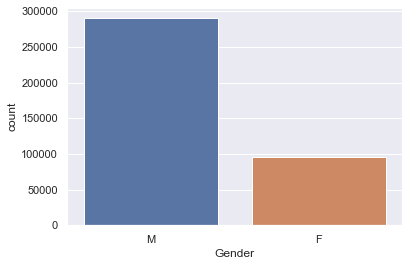

In [202]:
sns.countplot('Gender',data=X_train_)
plt.show()

In [203]:
def GenderEncoding(dataset):
    dataset['Gender'] = dataset['Gender'].map( {'F': 1, 'M': 0} ).astype(int)
    return dataset

In [204]:
X_train_ = GenderEncoding(X_train_)

In [205]:
X_train_.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Total_category,Product_popularity_Score,User_popularity_Score,Ocupation_Score,Male_ratio,Female_ratio,Population_Duration,Cat1_Popularity_per_User,Category1_Group
532017,1003916,P00057642,0,26-35,4,A,2,1,1,15,16,3,0.756223,0.267030,1.000000,0.7713,0.2287,0.525298,196,2
153907,1005788,P00223542,0,26-35,0,A,4+,0,1,8,17,3,0.232064,0.446866,0.955926,0.7713,0.2287,0.440367,328,2
162868,1001179,P00100642,0,51-55,1,B,2,1,5,15,-1,2,0.224012,0.140327,0.652652,0.7392,0.2608,0.525298,103,2
75278,1005604,P00059942,0,36-45,15,C,3,0,8,14,-1,2,0.019034,0.122616,0.167389,0.7569,0.2431,0.494281,90,2
525591,1003011,P00058442,0,26-35,1,B,1,0,5,14,-1,2,0.284773,0.054496,0.652652,0.7713,0.2287,1.000000,40,2


### 4.2.2 Encoding Methodology of the Age Column

#### Custom Encoding

* Creating custom Encoding based on the most frequnt Age Groups.

#### Objective:
* My strategy is to encode the Age columns with the average or mean of the Ages. I think it will be effective than label encoding as it will hold the standard age distribution.

* Taking the ceil value of the Average age.



* Creating a Mapper function of the Age ranges based on frequency.

In [206]:
#Age Mapping function
def AgeMapping(dataset):
    age_mapping = {"26-35": 7, "36-45": 6, "18-25": 5, "46-50": 4, "51-55": 3,"55+": 2, "0-17": 1}
    dataset['Age'] = dataset['Age'].map(age_mapping)
    return dataset
        

In [207]:
#Mapping the train_data into the age_mapper function
X_train_ = AgeMapping(X_train_)

In [208]:
#Encoded train_data
X_train_.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Total_category,Product_popularity_Score,User_popularity_Score,Ocupation_Score,Male_ratio,Female_ratio,Population_Duration,Cat1_Popularity_per_User,Category1_Group
532017,1003916,P00057642,0,7,4,A,2,1,1,15,16,3,0.756223,0.267030,1.000000,0.7713,0.2287,0.525298,196,2
153907,1005788,P00223542,0,7,0,A,4+,0,1,8,17,3,0.232064,0.446866,0.955926,0.7713,0.2287,0.440367,328,2
162868,1001179,P00100642,0,3,1,B,2,1,5,15,-1,2,0.224012,0.140327,0.652652,0.7392,0.2608,0.525298,103,2
75278,1005604,P00059942,0,6,15,C,3,0,8,14,-1,2,0.019034,0.122616,0.167389,0.7569,0.2431,0.494281,90,2
525591,1003011,P00058442,0,7,1,B,1,0,5,14,-1,2,0.284773,0.054496,0.652652,0.7713,0.2287,1.000000,40,2


### 4.2.3 Encoding Methodology of City Category Column

#### Objecticve

* label encoding: I am using label encoding here as to assign integer label to the city Column. To avoid ordinal ranking and dummy variable trap One-Hot-Encoding is applied.

* One Hot encoding is not needed for Tree based Algorithms beacuse it handles categorical variables.

In [209]:
l_encoder = LabelEncoder()

def City_Encoding(dataset):
    dataset['City_Category']=l_encoder.fit_transform(dataset['City_Category'])
    #temp1 = pd.get_dummies(dataset['City_Category'], prefix = 'City_category',drop_first=True)
    #dataset = pd.concat([dataset, temp1], axis = 1)
    #dataset = dataset.drop(['City_Category'], axis = 1)
    return dataset
    

In [210]:
X_train_ = City_Encoding(X_train_)


In [211]:
X_train_.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Total_category,Product_popularity_Score,User_popularity_Score,Ocupation_Score,Male_ratio,Female_ratio,Population_Duration,Cat1_Popularity_per_User,Category1_Group
532017,1003916,P00057642,0,7,4,0,2,1,1,15,16,3,0.756223,0.267030,1.000000,0.7713,0.2287,0.525298,196,2
153907,1005788,P00223542,0,7,0,0,4+,0,1,8,17,3,0.232064,0.446866,0.955926,0.7713,0.2287,0.440367,328,2
162868,1001179,P00100642,0,3,1,1,2,1,5,15,-1,2,0.224012,0.140327,0.652652,0.7392,0.2608,0.525298,103,2
75278,1005604,P00059942,0,6,15,2,3,0,8,14,-1,2,0.019034,0.122616,0.167389,0.7569,0.2431,0.494281,90,2
525591,1003011,P00058442,0,7,1,1,1,0,5,14,-1,2,0.284773,0.054496,0.652652,0.7713,0.2287,1.000000,40,2


### 4.2.4 Encoding Methodology of Stay_In_Current_City_Years Category

#### Custom Encoding

* We will encode the Duration based on the trend stated above

#### Objective:

* We can replace the stay suration by its Integer representation suggests the duration in years.

In [212]:
def YearsMapping(dataset):
    age_mapping = {"1":5 , "2": 4, "3": 3, "4+": 2, "0": 1}
    dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].map(age_mapping)
    return dataset

In [213]:
X_train_ = YearsMapping(X_train_)
X_train_.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Total_category,Product_popularity_Score,User_popularity_Score,Ocupation_Score,Male_ratio,Female_ratio,Population_Duration,Cat1_Popularity_per_User,Category1_Group
532017,1003916,P00057642,0,7,4,0,4,1,1,15,16,3,0.756223,0.267030,1.000000,0.7713,0.2287,0.525298,196,2
153907,1005788,P00223542,0,7,0,0,2,0,1,8,17,3,0.232064,0.446866,0.955926,0.7713,0.2287,0.440367,328,2
162868,1001179,P00100642,0,3,1,1,4,1,5,15,-1,2,0.224012,0.140327,0.652652,0.7392,0.2608,0.525298,103,2
75278,1005604,P00059942,0,6,15,2,3,0,8,14,-1,2,0.019034,0.122616,0.167389,0.7569,0.2431,0.494281,90,2
525591,1003011,P00058442,0,7,1,1,5,0,5,14,-1,2,0.284773,0.054496,0.652652,0.7713,0.2287,1.000000,40,2


--------------------------------------------------------------------------------------------------------------------------

In [214]:
#Dropping the User Id and ProductId as these are not relevant to the target variable.
def dropID(dataset):
    dataset = dataset.drop(['User_ID','Product_ID'],axis=1)
    return dataset

In [215]:
X_train_ = dropID(X_train_)

In [216]:
X_train_.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Total_category,Product_popularity_Score,User_popularity_Score,Ocupation_Score,Male_ratio,Female_ratio,Population_Duration,Cat1_Popularity_per_User,Category1_Group
532017,0,7,4,0,4,1,1,15,16,3,0.756223,0.267030,1.000000,0.7713,0.2287,0.525298,196,2
153907,0,7,0,0,2,0,1,8,17,3,0.232064,0.446866,0.955926,0.7713,0.2287,0.440367,328,2
162868,0,3,1,1,4,1,5,15,-1,2,0.224012,0.140327,0.652652,0.7392,0.2608,0.525298,103,2
75278,0,6,15,2,3,0,8,14,-1,2,0.019034,0.122616,0.167389,0.7569,0.2431,0.494281,90,2
525591,0,7,1,1,5,0,5,14,-1,2,0.284773,0.054496,0.652652,0.7713,0.2287,1.000000,40,2


---------------------------------------------------------------------------------------------------------------------------

# 5 <u> Mapping Functions to the Validation Set(25%)</u>



* All the above Feature Engineering methods mapped into Validation Dataset

In [217]:
#Applying all the Mappers into validation Set

###################### New Feature Generation Mapping ############################
X_validation_ = total_catgory(X_validation_)
X_validation_ = Product_Popularity_Score(X_validation_)
X_validation_ = User_Popularity_Score(X_validation_)
X_validation_ = OccupationScore(X_validation_)
X_validation_ = Age_Gender_Ratio(X_validation_)
X_validation_ = Population_Duration(X_validation_)
X_validation_ = Cat1_Popularity_User(X_validation_)
X_validation_ = category1_bucket(X_validation_)

##################### Encoding Mappers ########################################
X_validation_ = GenderEncoding(X_validation_)
X_validation_ = AgeMapping(X_validation_)
X_validation_ = City_Encoding(X_validation_)
X_validation_ = YearsMapping(X_validation_)
X_validation_ = dropID(X_validation_)

In [218]:
X_validation_.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Total_category,Product_popularity_Score,User_popularity_Score,Ocupation_Score,Male_ratio,Female_ratio,Population_Duration,Cat1_Popularity_per_User,Category1_Group
41001,0,5,0,2,3,0,1,6,-1,2,0.038911,0.109215,0.979909,0.7545,0.2455,0.494281,81,2
16151,0,3,1,0,1,0,12,-1,-1,1,0.297665,0.191126,0.663512,0.7392,0.2608,0.385004,102,0
507262,0,7,11,2,4,0,6,8,15,3,0.394942,0.102389,0.160960,0.7713,0.2287,0.525298,55,1
368698,0,7,7,2,2,1,1,2,9,3,0.970817,0.010239,0.818486,0.7713,0.2287,0.440367,9,2
353782,0,7,2,0,5,1,5,14,-1,2,0.774319,0.044369,0.362426,0.7713,0.2287,1.000000,41,2


In [219]:
X_validation_.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Total_category',
       'Product_popularity_Score', 'User_popularity_Score', 'Ocupation_Score',
       'Male_ratio', 'Female_ratio', 'Population_Duration',
       'Cat1_Popularity_per_User', 'Category1_Group'],
      dtype='object')

In [220]:
X_validation_.shape

(165021, 18)

-------------------------------------------------------------------------------------------------------------------------------

# 6 Feature Selection

## 6.1 Feature Importance Analysis
* Let's analyze the feature importancesof the features based on Tree based Algorithms.

In [221]:
X_train_.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Total_category',
       'Product_popularity_Score', 'User_popularity_Score', 'Ocupation_Score',
       'Male_ratio', 'Female_ratio', 'Population_Duration',
       'Cat1_Popularity_per_User', 'Category1_Group'],
      dtype='object')

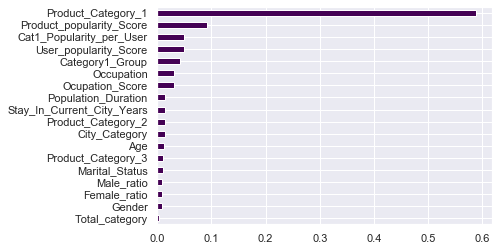

In [222]:
# Random Forest based Feature Importance
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20)
rf.fit(X_train_,y_train_)
rf.feature_importances_
feat_importances = pd.Series(rf.feature_importances_, index=X_train_.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh',cmap='viridis')
plt.show()

* As from the above graph it is visible that Product Category 1 has the heighest feature importance than others.

In [223]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
gbr = GradientBoostingRegressor(loss='ls', n_estimators=200, learning_rate=0.05, 
                                max_depth=8, max_features = 'sqrt',  
                                min_samples_split = 500, random_state=0)
gbr.fit(X_train_,y_train_)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

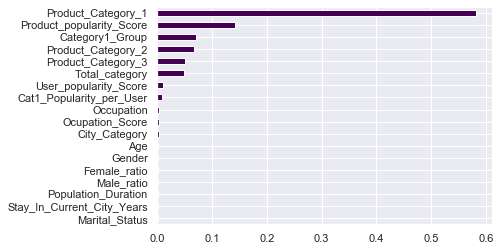

In [224]:
gbr.feature_importances_
feat_importances = pd.Series(gbr.feature_importances_, index=X_train_.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh',cmap='viridis')
plt.show()

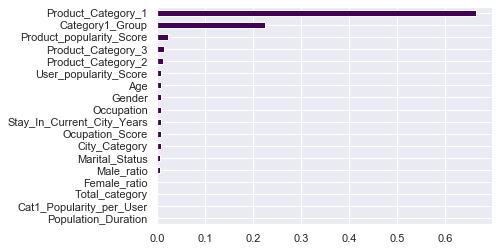

In [225]:
#XGB Regressor Based Feature Importance

from xgboost.sklearn import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=350,learning_rate=0.05, max_depth=12,min_child_weight=15,random_state=0,n_jobs=-1)
xgb_reg.fit(X_train_,y_train_)
xgb_reg.feature_importances_
feat_importances = pd.Series(xgb_reg.feature_importances_, index=X_train_.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh',cmap='viridis')
plt.show()

----------------------------------------------------------------------------------------------------------------------------

### Recursive Feature Elemination using combination of Feature Subset

#### Objective: RFE checks for all the feature set combination and fits it into the model.

* We have 19 predictive features. Recursive Feature elimination will tell hoe many features we should use to build the mode.
* Let's analyze top 12 features for the XGB Regressor Model.

* Defining a Cross Validation Strategy and Grid Search for tuning Hyperparams. My approach is to check for every features to check the RMSE score.

In [245]:
# step-2: specify range of hyperparameters to tune
# Scoring Technique: Neg mean Squared Error

hyper_params = [{'n_features_to_select': list(range(1, 10))}]


# step-3: perform grid search
# 3.1 specify model
xgb_reg = XGBRegressor(learning_rate=0.05,max_depth=7,min_child_weight=15,random_state=0,n_jobs=-1)
xgb_reg.fit(X_train_,y_train_)

rfe = RFE(xgb_reg)
           

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_root_mean_squared_error',  
                        verbose = 10,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_, y_train_)  

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] n_features_to_select=1 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_features_to_select=1, score=(train=-3030.165, test=-3023.912), total= 2.7min
[CV] n_features_to_select=1 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV]  n_features_to_select=1, score=(train=-4991.461, test=-4989.322), total= 3.1min
[CV] n_features_to_select=1 ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.8min remaining:    0.0s


[CV]  n_features_to_select=1, score=(train=-3029.268, test=-3026.945), total= 3.0min
[CV] n_features_to_select=1 ..........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.8min remaining:    0.0s


[CV]  n_features_to_select=1, score=(train=-3026.078, test=-3040.305), total= 2.9min
[CV] n_features_to_select=1 ..........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 11.7min remaining:    0.0s


[CV]  n_features_to_select=1, score=(train=-3027.632, test=-3033.785), total= 3.3min
[CV] n_features_to_select=2 ..........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 15.0min remaining:    0.0s


[CV]  n_features_to_select=2, score=(train=-3030.164, test=-3023.909), total= 3.2min
[CV] n_features_to_select=2 ..........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 18.2min remaining:    0.0s


[CV]  n_features_to_select=2, score=(train=-3030.971, test=-3020.690), total= 2.9min
[CV] n_features_to_select=2 ..........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 21.1min remaining:    0.0s


[CV]  n_features_to_select=2, score=(train=-3029.268, test=-3026.947), total= 2.8min
[CV] n_features_to_select=2 ..........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 23.9min remaining:    0.0s


[CV]  n_features_to_select=2, score=(train=-3026.078, test=-3040.311), total= 2.3min
[CV] n_features_to_select=2 ..........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 26.2min remaining:    0.0s


[CV]  n_features_to_select=2, score=(train=-3027.632, test=-3033.792), total= 2.3min
[CV] n_features_to_select=3 ..........................................
[CV]  n_features_to_select=3, score=(train=-2776.745, test=-2764.858), total= 2.2min
[CV] n_features_to_select=3 ..........................................
[CV]  n_features_to_select=3, score=(train=-2775.912, test=-2771.526), total= 2.2min
[CV] n_features_to_select=3 ..........................................
[CV]  n_features_to_select=3, score=(train=-2771.412, test=-2780.417), total= 2.2min
[CV] n_features_to_select=3 ..........................................
[CV]  n_features_to_select=3, score=(train=-2770.687, test=-2793.461), total= 2.2min
[CV] n_features_to_select=3 ..........................................
[CV]  n_features_to_select=3, score=(train=-2771.938, test=-2785.407), total= 2.2min
[CV] n_features_to_select=4 ..........................................
[CV]  n_features_to_select=4, score=(train=-2755.133, test=-2745

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 134.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RFE(estimator=XGBRegressor(base_score=0.5,
                                                  booster='gbtree',
                                                  colsample_bylevel=1,
                                                  colsample_bynode=1,
                                                  colsample_bytree=1, gamma=0,
                                                  gpu_id=-1,
                                                  importance_type='gain',
                                                  interaction_constraints='',
                                                  learning_rate=0.05,
                                                  max_delta_step=0, max_depth=7,
                                                  min_child_weight=15,
                                                  missing=nan,
                                                  monotone_constraints='()',
                                

* Due to crash and memory error I interrupt the cell.

In [246]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,179.853002,13.230953,0.075963,0.009026,1,{'n_features_to_select': 1},-3023.911608,-4989.321785,-3026.944549,-3040.304554,...,-3422.853477,783.254684,9,-3030.164590,-4991.461154,-3029.267953,-3026.078318,-3027.632074,-3420.920818,785.271415
1,162.404368,19.278718,0.064399,0.005118,2,{'n_features_to_select': 2},-3023.909091,-3020.690235,-3026.947354,-3040.310690,...,-3029.129875,7.070977,8,-3030.164415,-3030.970907,-3029.267771,-3026.078108,-3027.631869,-3028.822614,1.764310
2,131.964753,0.301015,0.181119,0.008213,3,{'n_features_to_select': 3},-2764.858017,-2771.526398,-2780.416980,-2793.460787,...,-2779.133803,10.078994,7,-2776.744676,-2775.912432,-2771.411636,-2770.686960,-2771.938286,-2773.338798,2.487217
3,118.301758,2.164747,0.186519,0.004476,4,{'n_features_to_select': 4},-2745.848465,-2750.861637,-2760.537522,-2774.849890,...,-2760.012455,10.658521,6,-2755.132925,-2756.445820,-2753.208230,-2748.872372,-2752.598808,-2753.251631,2.582560
4,718.625789,1221.581589,0.210438,0.028692,5,{'n_features_to_select': 5},-2731.369000,-2735.210884,-2745.815834,-2760.430224,...,-2745.138313,10.790373,5,-2740.949274,-2739.173545,-2737.366232,-2733.715830,-2737.785248,-2737.798026,2.394717
5,94.551456,1.230163,0.220214,0.017328,6,{'n_features_to_select': 6},-2727.440537,-2732.479817,-2742.029227,-2758.469340,...,-2741.995093,11.233460,4,-2728.394168,-2727.100510,-2724.131648,-2724.608173,-2722.425784,-2725.332057,2.140811
6,78.594503,2.285509,0.232379,0.028259,7,{'n_features_to_select': 7},-2726.456838,-2732.217682,-2739.475647,-2756.646162,...,-2740.887199,11.048429,3,-2725.967989,-2726.837232,-2721.084684,-2720.616356,-2722.320493,-2723.365351,2.556475
7,77.876992,4.616130,0.261997,0.037861,8,{'n_features_to_select': 8},-2719.035167,-2724.762883,-2736.939943,-2752.341180,...,-2735.288192,12.113287,2,-2719.618429,-2718.082707,-2717.151604,-2716.057296,-2714.911189,-2717.164245,1.622859
8,43.686882,2.085064,0.217619,0.006063,9,{'n_features_to_select': 9},-2714.580516,-2719.427071,-2730.503769,-2742.170297,...,-2729.249746,10.831729,1,-2713.364117,-2710.922711,-2709.478643,-2704.631122,-2708.878045,-2709.454928,2.864912


* As you can observe from the above table if we select n_features = 9, the mean RMSE score is best. Here rank test score suggests the best rank of combining all the features one by one. Below chart shows that.

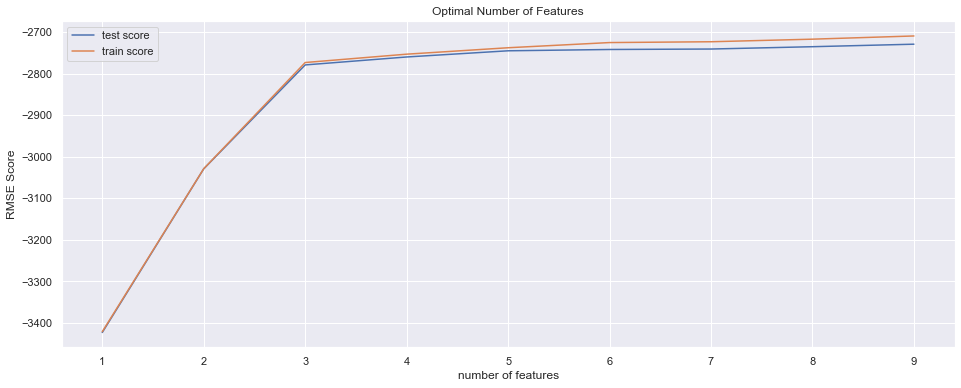

In [253]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('RMSE Score')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

* The chart suggests that there is very less difference between Train score and test score which suggests that our model is not overfitted.

In [236]:
from sklearn.feature_selection import RFE

xgb_reg = XGBRegressor(n_estimators=350,learning_rate=0.05, max_depth=12,min_child_weight=15,random_state=0,n_jobs=-1)
xgb_reg.fit(X_train_,y_train_)

rfe = RFE(xgb_reg, n_features_to_select = 10)
rfe = rfe.fit(X_train_,y_train_)

In [237]:
list(zip(X_train_.columns,rfe.support_,rfe.ranking_))

[('Gender', True, 1),
 ('Age', True, 1),
 ('Occupation', True, 1),
 ('City_Category', True, 1),
 ('Stay_In_Current_City_Years', False, 2),
 ('Marital_Status', False, 4),
 ('Product_Category_1', True, 1),
 ('Product_Category_2', True, 1),
 ('Product_Category_3', True, 1),
 ('Total_category', False, 7),
 ('Product_popularity_Score', True, 1),
 ('User_popularity_Score', True, 1),
 ('Ocupation_Score', False, 3),
 ('Male_ratio', False, 5),
 ('Female_ratio', False, 8),
 ('Population_Duration', False, 9),
 ('Cat1_Popularity_per_User', False, 6),
 ('Category1_Group', True, 1)]

* These are the top 10 features according to Recursive feature Selection

* Gender,Age,Occupation,City_Category,Product_Category_1,Product_Category_2,Product_Category_3,Product_popularity_Score,User_popularity_Score,Category1_Group

--------------

## 7 Model Selection and Hyperparameter Tuning 

## Base Models

### Lasso Regression

In [282]:
lassoReg = Lasso(alpha=0.5, normalize=True)
lassoReg.fit(X_train_,y_train_)
y_pred = lassoReg.predict(X_validation_)
rmse_lasso = np.sqrt(mean_squared_error(y_pred, y_validation_))

In [284]:
print(f"RMSE for Lasso Regression: {rmse_lasso}")

RMSE for Lasso Regression: 4476.088687027634


### Decision Tree Regressor

In [290]:
model_DT = DecisionTreeRegressor(max_depth=7,min_samples_split=10,random_state=0)

model_DT.fit(X_train_,y_train_)
y_pred = model_DT.predict(X_validation_)
rmse_model_DT = np.sqrt(mean_squared_error(y_pred, y_validation_))

In [291]:
print(f"RMSE for DT Regression: {rmse_model_DT}")

RMSE for DT Regression: 2885.1605269606057


### Random Forest Regression

In [285]:
model_randomforest = RandomForestRegressor(n_estimators=350, max_depth=7,random_state=0,n_jobs=-1)

model_randomforest.fit(X_train_,y_train_)
y_pred = model_randomforest.predict(X_validation_)
rmse_model_randomforest = np.sqrt(mean_squared_error(y_pred, y_validation_))

In [287]:
print(f"RMSE for Random forest Regression: {rmse_model_randomforest}")

RMSE for Random forest Regression: 2871.367496396862


--------------------

## XG Boost

### XGB Regressor without Cross validation - All the features

In [262]:
#RMSE - 2599.10 (learning_rate=0.2, max_depth=7, min_child_weight=15, random_state=0)

xgb_reg = XGBRegressor(n_estimators=350,learning_rate=0.05, max_depth=7,min_child_weight=15,random_state=0,n_jobs=-1)

xgb_reg.fit(X_train_,y_train_)
y_pred = xgb_reg.predict(X_validation_)
rmse_xgb = np.sqrt(mean_squared_error(y_pred, y_validation_))

xgb_reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=7,
             min_child_weight=15, missing=nan, monotone_constraints='()',
             n_estimators=350, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [263]:
y_pred = xgb_reg.predict(X_validation_)
rmse_xgb = np.sqrt(mean_squared_error(y_pred, y_validation_))

In [264]:
rmse_xgb

2836.3574656104597

In [265]:
xgb_score = xgb_reg.score(X_validation_,y_validation_)

In [266]:
xgb_score

0.6819416091130281

### XGB Regressor with Cross Validation

* I have used 5 fold Cross Validation and scoring Parameter is RMSE

In [267]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

####  Validation RMSE score

In [268]:
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 5, shuffle = True, random_state = 0)
avg_validation_score = np.mean(-cross_val_score(xgb_reg,X_validation_,y_validation_,cv=folds,scoring = 'neg_root_mean_squared_error'))

In [269]:
avg_validation_score

2659.2562199374074

#### Train RMSE Score

In [270]:
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 5, shuffle = True, random_state = 0)
avg_training_score = np.mean(-cross_val_score(xgb_reg,X_train_,y_train_,cv=folds,scoring = 'neg_root_mean_squared_error'))

In [271]:
avg_training_score

2642.7839276357854

----------------------------------------------------------------------------------------------------------------------

### XGB Regressor without Cross validation - with Top 10 featurtes

In [239]:
X_train_ = X_train_[['Gender','Age','Occupation','City_Category','Product_Category_1','Product_Category_2','Product_Category_3','Product_popularity_Score','User_popularity_Score','Category1_Group']]
X_validation_ = X_validation_[['Gender','Age','Occupation','City_Category','Product_Category_1','Product_Category_2','Product_Category_3','Product_popularity_Score','User_popularity_Score','Category1_Group']]

In [240]:
#RMSE - 2599.10 (learning_rate=0.2, max_depth=7, min_child_weight=15, random_state=0)

xgb_reg = XGBRegressor(n_estimators=350,learning_rate=0.05, max_depth=7,min_child_weight=15,random_state=0,n_jobs=-1)

xgb_reg.fit(X_train_,y_train_)
y_pred = xgb_reg.predict(X_validation_)
rmse_xgb = np.sqrt(mean_squared_error(y_pred, y_validation_))

xgb_reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=7,
             min_child_weight=15, missing=nan, monotone_constraints='()',
             n_estimators=350, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [243]:
y_pred = xgb_reg.predict(X_validation_)
rmse_xgb = np.sqrt(mean_squared_error(y_pred, y_validation_))

In [244]:
rmse_xgb

2836.3574656104597

In [241]:
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 5, shuffle = True, random_state = 0)
avg_score = np.mean(-cross_val_score(xgb_reg,X_validation_,y_validation_,cv=folds,scoring = 'neg_root_mean_squared_error'))

In [242]:
avg_score

2659.2562199374074

---------------------------------------------------------------------------------------------------------------------------